In [33]:
# Import library yang diperlukan

# 1. Pandas untuk manipulasi dan analisis data, terutama dengan struktur DataFrame.
import pandas as pd

# 2. NumPy untuk operasi matematis dan komputasi array n-dimensi.
import numpy as np

# 3. LabelBinarizer dari sklearn.preprocessing untuk mengonversi label kategori
#    menjadi format biner (one-hot encoding).
from sklearn.preprocessing import LabelBinarizer

# 4. KNeighborsClassifier dari sklearn.neighbors adalah algoritma K-Nearest Neighbors (KNN)
#    untuk klasifikasi berbasis jarak.
from sklearn.neighbors import KNeighborsClassifier

# 5. Fungsi-fungsi evaluasi dari sklearn.metrics:
#    - accuracy_score: untuk menghitung akurasi prediksi.
#    - precision_score: untuk menghitung presisi model.
#    - recall_score: untuk menghitung sensitivitas (recall).
#    - f1_score: untuk menghitung rata-rata harmonik antara presisi dan recall.
#    - classification_report: untuk menampilkan ringkasan metrik evaluasi.
#    - matthews_corrcoef: untuk menghitung koefisien korelasi Matthews.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, matthews_corrcoef
)

# 6. Fungsi `euclidean` dari scipy.spatial.distance untuk menghitung jarak Euclidean
#    antara dua titik dalam ruang n-dimensi.
from scipy.spatial.distance import euclidean

# 7. Matplotlib untuk membuat visualisasi data (plotting).
import matplotlib.pyplot as plt

# 8. Seaborn untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
path = '/content/drive/MyDrive/mp1b/AdultIncome.csv'

In [ ]:
df =pd.read_csv(path)

# Tampilkan beberapa baris pertama dataset untuk melihat struktur data
df.head()

,Age,IsAdult,Job,Qualification,MaritalStatus,Gender,BankBalance,Salary
0,39,1,GovtJob,Bachelor,UnMarried,Male,77516,<=50K
1,50,1,SelfEmployed,Bachelor,Married,Male,83311,<=50K
2,38,1,PrivateJob,Bachelor,Divorced,Male,215646,<=50K
3,53,1,PrivateJob,School,Married,Male,234721,<=50K
4,28,1,PrivateJob,Bachelor,Married,Female,338409,<=50K


In [36]:
# Memeriksa data yang hilang

print(df.isnull().sum())

Age              0
IsAdult          0
Job              0
Qualification    0
MaritalStatus    0
Gender           0
BankBalance      0
Salary           0
jarak            0
dtype: int64


In [ ]:
# Melihat informasi umum tentang dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  int64 
 1   IsAdult        32561 non-null  int64 
 2   Job            32561 non-null  object
 3   Qualification  32561 non-null  object
 4   MaritalStatus  32561 non-null  object
 5   Gender         32561 non-null  object
 6   BankBalance    32561 non-null  int64 
 7   Salary         32561 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.0+ MB
None


In [ ]:
# Melihat statistik deskriptif untuk kolom numerik

print(df.describe())

                Age       IsAdult   BankBalance
count  32561.000000  32561.000000  3.256100e+04
mean      38.581647      0.970978  1.897784e+05
std       13.640433      0.167872  1.055500e+05
min       17.000000      0.000000  1.228500e+04
25%       28.000000      1.000000  1.178270e+05
50%       37.000000      1.000000  1.783560e+05
75%       48.000000      1.000000  2.370510e+05
max       90.000000      1.000000  1.484705e+06


In [ ]:
# Mengganti nilai kolom 'Salary' dari <=50K/ >50K menjadi 0/1
df['Salary'] = df['Salary'].replace({'<=50K': 0, '>50K': 1})

<ipython-input-8-cbec7a34587c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Salary'] = df['Salary'].replace({'<=50K': 0, '>50K': 1})


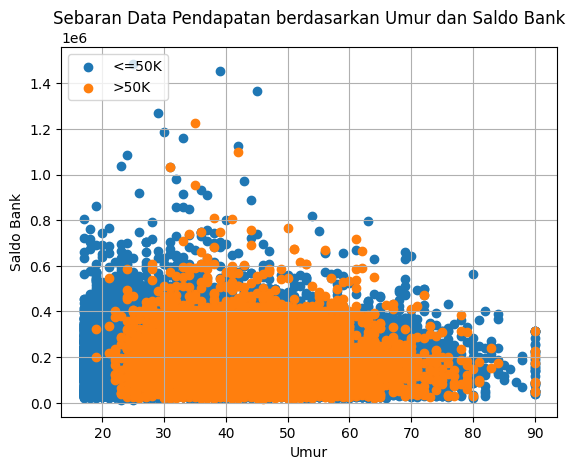

In [ ]:
# Visualisasi Data
# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Salary'
for salary, d in df.groupby('Salary'):
    # Membuat scatter plot untuk setiap grup
    ax.scatter(d['Age'], d['BankBalance'], label='>50K' if salary else '<=50K')

# Menambahkan legenda untuk membedakan grup berdasarkan 'Salary'
plt.legend(loc='upper left')

# Menambahkan judul pada plot
plt.title('Sebaran Data Pendapatan berdasarkan Umur dan Saldo Bank')

# Menambahkan label pada sumbu x (Umur)
plt.xlabel('Umur')

# Menambahkan label pada sumbu y (Saldo Bank)
plt.ylabel('Saldo Bank')

# Menambahkan grid untuk mempermudah pembacaan plot
plt.grid(True)

# Menampilkan plot ke layar
plt.show()

In [ ]:
# Mengonversi kolom 'Age' dan 'BankBalance' dari DataFrame df menjadi array NumPy 2D
x_train = np.array(df[['Age', 'BankBalance']])

# Mengonversi kolom 'Salary' dari DataFrame df menjadi array NumPy 1D
y_train = np.array(df['Salary'])

# Mencetak isi x_train (fitur/input) dengan format array NumPy
print(f'x_train:\n{x_train}\n')

# Mencetak isi y_train (label/output) dengan format array NumPy
print(f'y_train: {y_train}')

x_train:
[[    39  77516]
 [    50  83311]
 [    38 215646]
 ...
 [    58 151910]
 [    22 201490]
 [    52 287927]]

y_train: [0 0 0 ... 0 0 1]


In [ ]:
# Membuat objek LabelBinarizer, yang digunakan untuk mengonversi label kategori menjadi format biner
lb = LabelBinarizer()

# Menggunakan LabelBinarizer untuk mengonversi y_train (label asli) menjadi format biner
# fit_transform() secara otomatis melakukan dua hal:
# 1. Menyesuaikan LabelBinarizer dengan data (fit)
# 2. Mengonversi data sesuai dengan skema biner (transform)
y_train = lb.fit_transform(y_train)

# Mencetak hasil y_train setelah dikonversi ke format biner
print(f'y_train: {y_train}')

y_train: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [ ]:
# Mengubah array 2D y_train menjadi array 1D menggunakan fungsi flatten()
# Setelah LabelBinarizer, y_train berbentuk array 2D dengan setiap label dalam format biner,
# seperti [[0], [1], [1], ...]. flatten() mengubahnya menjadi [0, 1, 1, ...].
y_train = y_train.flatten()

# Mencetak hasil y_train setelah diubah menjadi array 1D
print(f'y_train: {y_train}')

y_train: [0 0 0 ... 0 0 1]


In [ ]:
# Menentukan jumlah nearest neighbors/tetangga terdekat (K) yang digunakan dalam algoritma K-Nearest Neighbors (KNN)
K = 3

# Membuat objek model KNeighborsClassifier dengan parameter n_neighbors=K
# n_neighbors menentukan jumlah tetangga yang akan dipertimbangkan dalam proses klasifikasi
model = KNeighborsClassifier(n_neighbors=K)

# Melatih model KNN menggunakan data latih (x_train) dan label latih (y_train)
# model.fit() akan menemukan pola dalam data latih untuk kemudian digunakan dalam prediksi
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Menetapkan nilai umur (A_Age) dan saldo bank (A_BankBalance) untuk data baru
A_Age = 50
A_BankBalance = 100000

# Membuat array NumPy dengan data baru [A_Age, A_BankBalance] dan mengubahnya menjadi array 2D dengan reshape
x_new = np.array([A_Age, A_BankBalance]).reshape(1, -1)

# Menampilkan x_new untuk memverifikasi format data baru (array 2D dengan 1 baris)
x_new

array([[    50, 100000]])

In [ ]:
# Menggunakan model yang telah dilatih (model) untuk memprediksi label dari data baru (x_new)
# model.predict(x_new) akan mengembalikan hasil prediksi berdasarkan input data baru
y_new = model.predict(x_new)

# Menampilkan hasil prediksi y_new yang berisi label (salary) untuk data baru
y_new

array([1])

In [ ]:
# Menggunakan inverse_transform() dari LabelBinarizer untuk mengonversi hasil prediksi (y_new)
# dari format biner kembali ke label asli.
# Ini diperlukan karena LabelBinarizer mengubah label menjadi format biner selama pelatihan,
# dan kita ingin mengembalikannya ke format aslinya.
lb.inverse_transform(y_new)

array([1])

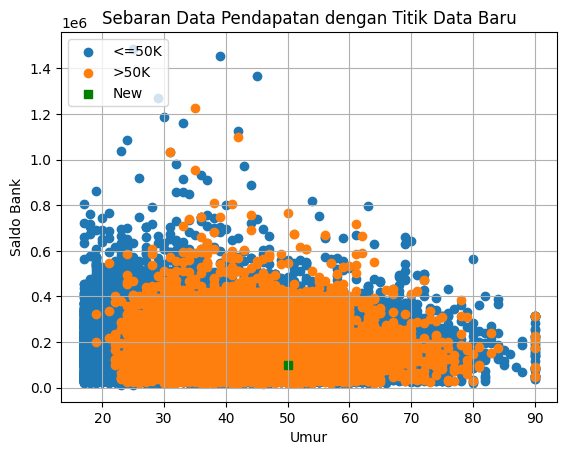

In [ ]:
# Membuat figure dan axes untuk plot menggunakan Matplotlib lagi
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'Salary'
for salary, d in df.groupby('Salary'):
    # Membuat scatter plot untuk setiap grup
    ax.scatter(d['Age'], d['BankBalance'], label='>50K' if salary else '<=50K')

# Menambahkan titik data baru (A_Age, A_BankBalance) dengan gaya khusus
plt.scatter(A_Age,
            A_BankBalance,
            marker='s',  # Menandakan titik data baru menggunakan bentuk persegi
            color='green',  # Menentukan warna titik data baru menjadi hijau
            label='New')  # Label untuk titik data baru

# Menambahkan legenda untuk membedakan grup berdasarkan 'Salary' dan data baru 'New'
plt.legend(loc='upper left')
# Menambahkan judul pada plot
plt.title('Sebaran Data Pendapatan dengan Titik Data Baru')
# Menambahkan label pada sumbu x (Umur)
plt.xlabel('Umur')
# Menambahkan label pada sumbu y (Saldo Bank)
plt.ylabel('Saldo Bank')
# Menambahkan grid ke plot untuk mempermudah pembacaan visual
plt.grid(True)
# Menampilkan plot ke layar
plt.show()

In [ ]:
# Membuat array NumPy baru dengan data umur (A_Age) dan saldo bank (A_BankBalance)
# Data ini disimpan dalam array 1D yang berisi dua nilai: umur dan saldo bank
New = np.array([A_Age, A_BankBalance])

# Menampilkan array 'New' yang berisi nilai umur dan saldo bank
New

array([    50, 100000])

In [ ]:
# 'x_train' adalah array atau DataFrame yang berisi data latih (fitur) yang digunakan untuk melatih model
# Dalam konteks ini, 'x_train' berisi dua kolom fitur: 'Age' (Umur) dan 'BankBalance' (Saldo Bank),
x_train

array([[    39,  77516],
       [    50,  83311],
       [    38, 215646],
       ...,
       [    58, 151910],
       [    22, 201490],
       [    52, 287927]])

In [ ]:
# Menghitung jarak Euclidean antara data baru (New) dan setiap data dalam x_train
# Jarak Euclidean dihitung untuk setiap elemen (d) dalam x_train menggunakan list comprehension
data_jarak = [euclidean(New, d) for d in x_train]

# Menampilkan list 'data_jarak' yang berisi jarak Euclidean antara data baru (New) dan setiap data latih
data_jarak

[22484.002690802186,
 16689.0,
 115646.00062258962,
 134721.00003340238,
 238409.00101506236,
 184582.00045779112,
 60187.00000830744,
 109642.00001824119,
 54219.003329091174,
 59449.0005382765,
 180464.00046823744,
 41297.00484296652,
 22272.016365834505,
 105019.001542578,
 21772.002296527528,
 145487.0008798037,
 76756.00407134285,
 86824.00186584353,
 71113.0010124731,
 192175.00012748796,
 93524.00053462213,
 202146.00003957536,
 23155.004858561355,
 17037.001438046544,
 9015.00449251136,
 116851.00015404233,
 68294.0070357568,
 80211.00009973695,
 267260.00022637134,
 93366.00000535526,
 90709.00401834429,
 166015.0027105984,
 286940.00004356314,
 40049.00499388218,
 211512.00185332273,
 142406.00001404434,
 97200.00432613159,
 444091.0010819854,
 15846.011390883195,
 165477.00001208627,
 407875.00044253754,
 11494.000391508607,
 72987.00463096153,
 5362.000093248787,
 189980.00164491,
 237895.0001029866,
 44361.000101440455,
 28354.000634831056,
 1603.0252649287845,
 171466.001

In [ ]:
# Menambahkan kolom baru ke DataFrame 'df' dengan nama 'jarak' yang berisi data jarak Euclidean
# 'data_jarak' adalah list yang berisi jarak Euclidean antara data baru (New) dan setiap data dalam x_train.
df['jarak'] = data_jarak

# Mengurutkan DataFrame 'df' berdasarkan kolom 'jarak' secara ascending (default)
# Ini akan mengurutkan data berdasarkan jarak terdekat ke data baru (New).
df.sort_values(['jarak'])

,Age,IsAdult,Job,Qualification,MaritalStatus,Gender,BankBalance,Salary,jarak
31239,51,1,PrivateJob,School,Divorced,Female,99987,0,1.303840e+01
3204,50,1,SelfEmployed,Bachelor,Widowed,Male,100029,1,2.900000e+01
25437,51,1,SelfEmployed,Doctorate,Married,Male,100029,1,2.901724e+01
21599,53,1,SelfEmployed,Doctorate,Married,Male,100029,1,2.915476e+01
22577,45,1,PrivateJob,Bachelor,Married,Male,99971,0,2.942788e+01
...,...,...,...,...,...,...,...,...,...
8258,35,1,PrivateJob,Bachelor,Married,Male,1226583,1,1.126583e+06
15569,29,1,PrivateJob,Bachelor,Married,Male,1268339,0,1.168339e+06
16739,45,1,PrivateJob,Bachelor,Divorced,Female,1366120,0,1.266120e+06
18138,39,1,PrivateJob,Bachelor,Divorced,Male,1455435,0,1.355435e+06


In [ ]:
# Testing Set
# Membuat array NumPy untuk data uji (x_test), yang berisi fitur yang akan diuji oleh model
x_test = np.array([[25, 50000], [45, 60000], [35, 30000], [55, 120000]])

# Membuat array NumPy untuk label target uji (y_test), yang berisi hasil untuk masing-masing data uji
y_test = lb.transform(np.array([0, 1, 0, 1])).flatten()  # Mengubah label asli menjadi format biner (0 untuk '<=50K', 1 untuk '>50K')

# Menampilkan nilai 'x_test' yang berisi fitur dari data uji (umur dan saldo bank)
print(f'x_test:\n{x_test}\n')

# Menampilkan nilai 'y_test' yang berisi label target dalam format biner (0 atau 1)
print(f'y_test: {y_test}')


x_test:
[[    25  50000]
 [    45  60000]
 [    35  30000]
 [    55 120000]]

y_test: [0 1 0 1]


In [ ]:
# Prediksi terhadap testing set

# Menggunakan model yang telah dilatih untuk membuat prediksi berdasarkan data uji (x_test)
# 'model.predict()' akan memprediksi label target untuk setiap data di 'x_test'
y_pred = model.predict(x_test)

# Menampilkan hasil prediksi yang disimpan dalam variabel 'y_pred'
# 'y_pred' berisi array dengan prediksi model untuk setiap data uji dalam 'x_test'
y_pred

array([0, 1, 0, 0])

In [ ]:
# Menghitung akurasi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'accuracy_score()' dari sklearn.metrics akan menghitung persentase prediksi yang benar dari total prediksi
acc = accuracy_score(y_test, y_pred)

# Menampilkan nilai akurasi yang dihitung
# 'acc' berisi nilai akurasi yang menunjukkan seberapa tepat model dalam memprediksi label yang benar
print(f'Accuracy: {acc}')

Accuracy: 0.75


In [ ]:
# Menghitung presisi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'precision_score()' dari sklearn.metrics digunakan untuk menghitung presisi
# Presisi adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh prediksi positif (True Positives + False Positives)
prec = precision_score(y_test, y_pred)

# Menampilkan nilai presisi yang dihitung
# 'prec' berisi nilai presisi yang menunjukkan seberapa akurat model dalam mengklasifikasikan kelas positif (misalnya 'Yes')
print(f'Precision: {prec}')

Precision: 1.0


In [ ]:
# Menghitung recall (sensitivitas) model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'recall_score()' dari sklearn.metrics digunakan untuk menghitung recall
# Recall adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh data yang sebenarnya positif (True Positives + False Negatives)
rec = recall_score(y_test, y_pred)

# Menampilkan nilai recall yang dihitung
# 'rec' berisi nilai recall yang menunjukkan seberapa baik model dalam mendeteksi semua kasus positif
print(f'Recall: {rec}')

Recall: 0.5


In [ ]:
# Menghitung F1 score model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'f1_score()' dari sklearn.metrics digunakan untuk menghitung F1 score
# F1 score adalah rata-rata harmonis antara presisi dan recall, yang memberikan keseimbangan antara keduanya
# Formula F1 score adalah: F1 = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)

# Menampilkan nilai F1 score yang dihitung
# 'f1' berisi nilai F1 score yang menunjukkan keseimbangan antara presisi dan recall untuk model
print(f'F1 Score: {f1}')

F1 Score: 0.6666666666666666


In [ ]:
# Menghitung laporan klasifikasi untuk menilai kinerja model dalam hal presisi, recall, f1 score, dan akurasi
# Fungsi 'classification_report()' dari sklearn.metrics menghasilkan laporan evaluasi yang lebih lengkap
# Laporan ini mencakup metrik-metrik seperti presisi, recall, F1 score, dan support untuk setiap kelas (misalnya, 'Yes' dan 'No')
cls_report = classification_report(y_test, y_pred)

# Menampilkan laporan klasifikasi yang dihitung
# 'cls_report' berisi ringkasan metrik evaluasi model yang memberikan informasi detail tentang kinerja model per kelas
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
# Menghitung Matthews Correlation Coefficient (MCC) untuk menilai kinerja model secara keseluruhan
# Fungsi 'matthews_corrcoef()' dari sklearn.metrics digunakan untuk menghitung MCC
# MCC adalah metrik yang mengukur kualitas prediksi dalam masalah klasifikasi biner
# Nilai MCC berkisar antara -1 (prediksi sepenuhnya salah) hingga +1 (prediksi sepenuhnya benar),
# dan nilai 0 menunjukkan prediksi acak atau model yang tidak lebih baik dari tebakan acak
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan nilai MCC yang dihitung
# 'mcc' berisi nilai Matthews Correlation Coefficient yang menunjukkan seberapa baik model dalam memprediksi kelas positif dan negatif
print(f'MCC: {mcc}')

MCC: 0.5773502691896258
